### Python For Math and Stat: Homework #8 by Ethan Schacht

In [88]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import random as r

Problem 1: This recursive function finds the sum of the first n cubes.

In [2]:
def sum_cubes(n):
    if n == 0:
        return 0
    
    return sum_cubes(n-1) + n**3

sum_cubes(25)

105625

Problem 2: This recursive function returns the first palindrome that is greater than or equal to start

In [7]:
def first_palindrome(start):
    
    str_num = str(start)
    if str_num == str_num[::-1]:
        return start
    
    return first_palindrome(start+1)

first_palindrome(25973), first_palindrome(12321) 

(26062, 12321)

Problem 3: This function takes an array and returns a tuple containing attributes of the array

In [27]:
def array_attrib(arr):
    
    arr = np.array(arr)
    
    dimensions = arr.ndim
    shape = arr.shape
    length = len(arr.flatten())
    d_type = arr.dtype
    
    return (dimensions, shape, length, d_type)

a = np.array(range(10)).reshape(5, 2)
array_attrib(a)

(2, (5, 2), 10, dtype('int64'))

Problem 4: This function takes an array of numbers and returns a tuple containing the following:

* largest element
* smallest element
* sum of the elements
* product of the elements
* mean of the elements
* median of the elements

In [32]:
def array_stats(arr):
    
    nums = arr.flatten()
    return (max(nums), min(nums), sum(nums), np.product(nums), np.mean(nums), np.median(nums))

b = a**2 + 1
array_stats(b)

(82, 1, 295, 435834100000, 29.5, 21.5)

Problem 5: This function takes a two-dimensional numpy array as input. If the number of columns is odd, the function returns the middle column. If the number of columns is even, the function returns the average of the two middle columns.

In [41]:
def array_middle(arr):
    median_list = []
    for i in arr:
        if len(i) % 2 == 1:
            median_list.append(i[len(i) // 2])
        else:
            median_list.append((i[len(i) // 2] + i[(len(i) // 2) - 1]) / 2)
    return np.array(median_list)

array_middle(a), array_middle(b.reshape(2, 5))

(array([0.5, 2.5, 4.5, 6.5, 8.5]), array([ 5, 50]))

Problem 6: This problem creates the following arrays:

* xvals: contains 100 equally spaced partition points on the interval  [−2𝜋,2𝜋] 
* cosvals: the result from applying the cosine function to xvals.
* t2vals: the result from applying the function  𝑇2  to xvals.
* t4vals: the result from applying the function  𝑇4  to xvals.

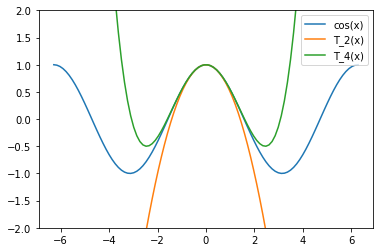

In [52]:
xvals = np.linspace(-2*m.pi, 2*m.pi, 100)
cosvals = [np.cos(i) for i in xvals]
t2vals = [1 - (i**2 / 2) for i in xvals]
t4vals = [1 - (i**2 / 2) + (i**4 / 24) for i in xvals]

plt.plot(xvals, cosvals)
plt.plot(xvals, t2vals)
plt.plot(xvals, t4vals)
plt.ylim(-2,2)
plt.legend(("cos(x)", "T_2(x)", "T_4(x)"), loc = "upper right")
plt.show()

Problem 7.1: This function takes a list of numbers and does the following:

* generates nsamples samples of the given size
* computes the mean for each of the samples
* returns the list of sample means.

In [65]:
def sample_means(nums, size, nsamples):
    r_sample = [r.sample(nums, size) for i in range(nsamples)]
    return r_sample

sample_means([1,2,3,4,5], 2, 5)

[[2, 1], [4, 2], [4, 2], [2, 4], [5, 3]]

Problem 7.2: Plots the sample means as a histogram by calling plt.hist(sinmeans)

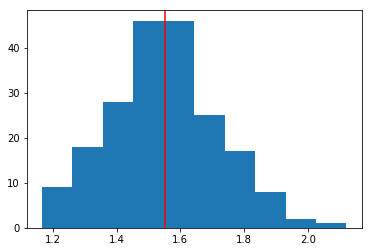

In [87]:
sinvals = list(np.linspace(0, m.pi, 1000))
sinmeans = sample_means(sinvals, 30, 200) 

sinmeans = [np.mean(i) for i in np.array(sinmeans)]

sinmeans
plt.hist(sinmeans)
plt.axvline(x=np.mean(sinmeans), c = "r")
plt.show()

Problem 8.1: This function tests if a matrix is a semi-magic square

In [56]:
def is_semimagic(mat):
    row_sum_list = []
    col_sum_list = [0 for i in range(len(mat[0]))]
    for i in mat:
        row_sum_list.append(sum(i))
    for i in range(len(mat)):
        for j in range(len(mat[0])):
            col_sum_list[j] += mat[i][j]
    all_elements = row_sum_list + col_sum_list
    check = True
    for i in all_elements:
        if all_elements[0] != i:
            check = False 
    return check

            
    
is_semimagic([[3,7,5], [8,6,1], [4,2,9]]), 

True

Problem 8.2: This function test if a matrix is magic.

In [64]:
def is_magic(mat):

    diagonal_sum1 = 0
    for i in range(len(mat)):
        diagonal_sum1 += mat[i][i]
    diagonal_sum2 = 0
    for i in range(len(mat)): 
        diagonal_sum2 += mat[i][len(mat) - i - 1]
    row_sum_list = []
    col_sum_list = [0 for i in range(len(mat[0]))]
    for i in mat:
        row_sum_list.append(sum(i))
    for i in range(len(mat)):
        for j in range(len(mat[0])):
            col_sum_list[j] += mat[i][j]
    all_elements = row_sum_list + col_sum_list + [diagonal_sum1] + [diagonal_sum2]

    check = True
    for i in all_elements:
        if all_elements[0] != i:
            check = False 
    return check
    

is_magic([[3,7,5], [8,6,1], [4,2,9]])

False

Problem 8.3: Check Franklin's Squares

In [100]:
with open('franklin1.txt') as fp: 
    lines = [line.strip().split() for line in fp]

lines = np.array(lines)
lines = lines.astype(int)

is_magic(lines), is_semimagic(lines) #Franklin1 is semi-magic

(False, True)

In [101]:
with open('franklin2.txt') as fp: 
    lines2 = [line.strip().split() for line in fp]

lines2 = np.array(lines2)
lines2 = lines2.astype(int)

is_magic(lines2), is_semimagic(lines2) #Franklin2 is magic

(True, True)

Challenge Problem: Write a function shoelace(vertices) that takes an  𝑛×2  numpy array of vertices and returns the area of the corresponding polygon.

In [106]:
def shoelace(vertices):
    x_vals = []
    y_vals = []
    for i in vertices:
        x_vals.append(i[0])
        y_vals.append(i[1])
    
    area = 0
    for i in range(len(vertices)):
        area += (x_vals[i-1] + x_vals[i]) * (y_vals[i-1] - y_vals[i]) 
    return abs(area / 2)

shoelace([(2,4),(3,-8),(1,2)])

7.0